# Banking Deserts

In [56]:
# Dependencies
from census import Census
from config import census_key
import hvplot.pandas
import pandas as pd
import requests
import time
from scipy.stats import linregress
from matplotlib import pyplot as plt
import scipy.stats as st

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

census_key = "f58f3bd88a0f286ae60716409463b28b838a1269"

# Create an instance of the Census library
c = Census(census_key)

## 1. Retrieve data from the U.S. Census using the Census Python library and the preconfigured labels

References:

* Review the following page to review the Python library documentation: <https://github.com/CommerceDataService/census-wrapper>

* Review the following page to learn more about the data labels: <https://gist.github.com/afhaque/60558290d6efd892351c4b64e5c01e9b>

In [57]:
# Run Census Search to retrieve data on all zip codes (2013 ACS5 Census)
census_data = c.acs5.get(
    (
        "B01003_001E",
        "B17001_002E"
    ),
    {'for': 'zip code tabulation area:*'}
)

# Convert to DataFrame
census_pd = pd.DataFrame(census_data)

# Column renaming
census_pd = census_pd.rename(
    columns = {
        "B01003_001E": "Population",
        "B17001_002E": "Poverty Count",
        "zip code tabulation area": "Zipcode"
    }
)

# Add a Poverty Rate column (Poverty Count / Population)
census_pd["Poverty Rate"] = census_pd["Poverty Count"] / census_pd["Population"] *100

# Configure the final DataFrame
census_pd = census_pd[
    [
        "Zipcode",
        "Population",
        "Poverty Rate"
    ]
]

# Display DataFrame length and sample data
print(f"Number of rows in the DataFrame: {len(census_pd)}")
census_pd.head()

Number of rows in the DataFrame: 33120


,Zipcode,Population,Poverty Rate
0,00601,16773.0,64.210338
1,00602,37083.0,48.445379
2,00603,45652.0,50.151143
3,00606,6231.0,59.396566
4,00610,26502.0,45.151309


## 2. Load the `zip_bank_data.csv` file into a DataFrame. Next, use Pandas to merge this data set with the Census data that you retrieved along the zip code.

In [58]:
# Import the zip bank data. Use dtype="object" to ensure all data is read in accurately.
zip_code_pd = pd.read_csv("../Resources/zip_bank_data.csv")

# Display sample data
zip_code_pd.head()

,Unnamed: 0,Zipcode,Address,Median Age,Household Income,Per Capita Income,Lat,Lng,Bank Count
0,0,49908,"Baraga, MI 49908",46,27030,15371,46.8359,-88.5070,5
1,1,47443,"Lyons, IN 47443",33,83212,91548,38.9565,-87.0931,8
2,2,55392,"Navarre, MN 55392",38,182718,56648,44.9434,-93.6077,81
3,3,74469,"Warner, OK 74469",43,183752,82932,35.5007,-95.3006,73
4,4,70791,"Zachary, LA 70791",43,120257,69028,30.6455,-91.1385,78


In [59]:
zip_code_pd["Zipcode"].describe()

count     1000.000000
mean     49276.939000
std      26974.775098
min        804.000000
25%      27236.250000
50%      48460.500000
75%      71047.500000
max      99950.000000
Name: Zipcode, dtype: float64

In [60]:
census_pd["Zipcode"] = census_pd["Zipcode"].astype(float)
# Merge the two data sets along zip code
census_data_complete = pd.merge(zip_code_pd, census_pd, on='Zipcode')

# Remove rows with missing data
# census_data_complete = census_data_complete[census_data_complete['Lat'] != ""]
# census_data_complete = census_data_complete[census_data_complete['Lng'] != ""]
# census_data_complete = census_data_complete[census_data_complete['Poverty Rate'] != ""]
census_data_complete.dropna(inplace=True)

# Transform latitude and longitude to float
census_data_complete["Lat"] = census_data_complete['Lat'].astype(float)
census_data_complete["Lng"] = census_data_complete['Lng'].astype(float)

# Display sample data
census_data_complete.head()

,Unnamed: 0,Zipcode,Address,Median Age,Household Income,Per Capita Income,Lat,Lng,Bank Count,Population,Poverty Rate
0,0,49908,"Baraga, MI 49908",46,27030,15371,46.8359,-88.5070,5,3333.0,10.381038
1,1,47443,"Lyons, IN 47443",33,83212,91548,38.9565,-87.0931,8,1419.0,17.124736
2,3,74469,"Warner, OK 74469",43,183752,82932,35.5007,-95.3006,73,2251.0,23.100844
3,4,70791,"Zachary, LA 70791",43,120257,69028,30.6455,-91.1385,78,27365.0,7.761739
4,5,76885,"Valley Spring, TX 76885",34,29712,11057,30.8310,-98.8289,5,234.0,3.418803


## 3. Use GeoViews to create a poverty rate map.

* Use the "Poverty Rate" column to set the point's size. Recall to use the `scale` parameter to modify the size appearance.

* Use the "Zipcode" column to set the point's colour.

* Read the HoloViews documentation and learng how you can use the `hover_cols` parameter to add additional information to the tooltip of a point. Add the "Address" and the "Bank Count" columns.

In [5]:
# Configure the map
poverty_rate_map = # YOUR CODE HERE

# Display the map plot
poverty_rate_map

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lng,Lat]   (Zipcode,Poverty Rate,Address,Bank Count)

## 4. Compute and print the summary statistics for "Poverty Rate", "Bank Count", and "Population"

In [61]:
# Mean, median, mode for Poverty Rate
# Mean
mean_value = census_data_complete['Poverty Rate'].mean()

# Median
median_value = census_data_complete['Poverty Rate'].median()

# Mode
mode_value = census_data_complete['Poverty Rate'].mode()[0]

# The [0] at the end of the mode calculation is used to extract the first mode value,
# in case there are multiple modes.

# Printing the results
print("Mean: ", mean_value)
print("Median: ", median_value)
print("Mode: ", mode_value)

Mean:  12.76749119987164
Median:  10.153256704980842
Mode:  0.0


In [62]:
# Mean, median, mode for Bank Count
# Mean
mean_value = census_data_complete['Bank Count'].mean()

# Median
median_value = census_data_complete['Bank Count'].median()

# Mode
mode_value = census_data_complete['Bank Count'].mode()[0]

# The [0] at the end of the mode calculation is used to extract the first mode value,
# in case there are multiple modes.

# Printing the results
print("Mean: ", mean_value)
print("Median: ", median_value)
print("Mode: ", mode_value)

Mean:  40.91867852604828
Median:  36.0
Mode:  4


In [63]:
# Mean, median, mode for Population
# Mean
mean_value = census_data_complete['Population'].mean()

# Median
median_value = census_data_complete['Population'].median()

# Mode
mode_value = census_data_complete['Population'].mode()[0]

# The [0] at the end of the mode calculation is used to extract the first mode value,
# in case there are multiple modes.

# Printing the results
print("Mean: ", mean_value)
print("Median: ", median_value)
print("Mode: ", mode_value)

Mean:  9968.224904701397
Median:  2617.0
Mode:  58.0


## 5. Create a scatter plot with linear regression for **bank count** vs. **poverty rate**.

* Be sure `NaN` values are dropped from the DataFrame.

* Plot the data points.

* Plot the linear regression line.

* Print the R<sup>2</sup> value.

y = 0.16x +38.88


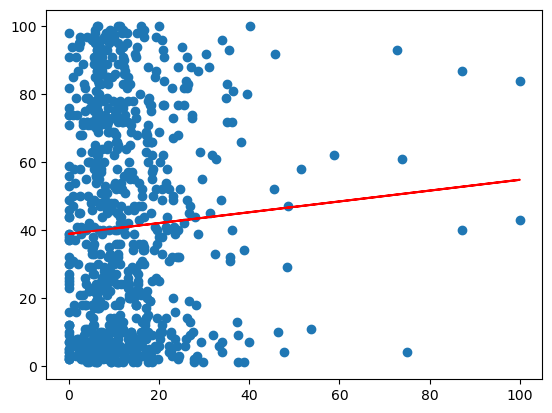

In [64]:
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = census_data_complete['Poverty Rate'].astype(float)
y_values = census_data_complete['Bank Count'].astype(float)

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
regress_values = x_values * slope + intercept
# Plot scatter plot
plt.scatter(x_values,y_values)


# Plot regression line

plt.plot(x_values,regress_values,"-r")


# Label plot
# YOUR CODE HERE

# Print r square value
# YOUR CODE HERE

# Show plot
plt.show()
# YOUR CODE HERE

## 6. Analysis.

Write a sentence describing your findings. Were they what you expected? What other factors could be at play?

YOUR ANSWER HERE